## Modelos - Todas as features - Random Forest

In [2]:
#Importando os pacotes
import pandas as pd      
import matplotlib.pyplot as plt    
import numpy as np   
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import combinations
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

In [40]:
df = pd.read_csv('dados_modf3-4000-janela.csv')
df_orig = df
df = df.drop(['arquivo', 'divisao'], axis=1)
df = df.drop(['valor_h_1', 'valor_h_2', 'valor_h_3', 'valor_h_4'], axis=1)

# CARACTERÍSTICAS DO LADO ESQUERDO
# df = df[['Condicao', 'Freq', 'valor_rms_1', 'valor_sra_1', 'valor_sv_1', 'valor_kts_1', 'valor_ppv_1', 'valor_cf_1',
#          'valor_if_1', 'valor_mf_1', 'valor_sf_1', 'valor_kf_1', 'valor_ffc_1', 'valor_fvar_1', 'valor_fskew_1',
#          'valor_fkur_1', 'valor_rms_2', 'valor_sra_2', 'valor_sv_2', 'valor_kts_2', 'valor_ppv_2', 'valor_cf_2', 'valor_if_2',
#          'valor_mf_2', 'valor_sf_2', 'valor_kf_2', 'valor_ffc_2', 'valor_fvar_2', 'valor_fskew_2', 'valor_fkur_2']]

# CARACTERÍSTICAS DO LADO ESQUERDO SELECIONADAS
# df = df[['Condicao', 'Freq', 'valor_rms_1', 'valor_sra_1', 'valor_ffc_1', 'valor_fskew_1', 'valor_fkur_1', 'valor_rms_2',
#          'valor_sra_2', 'valor_kts_2', 'valor_sf_2', 'valor_ffc_2', 'valor_fvar_2', 'valor_fskew_2', 'valor_fkur_2']]

# CARACTERÍSTICAS DO LADO DIREITO
# df = df[['Condicao','Freq','valor_rms_3','valor_sra_3', 'valor_sv_3', 'valor_kts_3', 'valor_ppv_3', 'valor_cf_3', 'valor_if_3',
#          'valor_mf_3', 'valor_sf_3', 'valor_kf_3', 'valor_ffc_3', 'valor_fvar_3', 'valor_fskew_3', 'valor_fkur_3',
#          'valor_rms_4', 'valor_sra_4', 'valor_sv_4', 'valor_kts_4', 'valor_ppv_4', 'valor_cf_4', 'valor_if_4',
#          'valor_mf_4', 'valor_sf_4', 'valor_kf_4', 'valor_ffc_4', 'valor_fvar_4', 'valor_fskew_4', 'valor_fkur_4']]

# CARACTERÍSTICAS DO LADO DIREITO SELECIONADAS
# df = df[['Condicao', 'Freq', 'valor_rms_3', 'valor_sra_3', 'valor_ppv_3', 'valor_kf_3', 'valor_ffc_3', 'valor_fvar_3',
#          'valor_fskew_3', 'valor_rms_4', 'valor_sra_4', 'valor_ppv_4', 'valor_ffc_4', 'valor_fskew_4',
#          'valor_fkur_4']]

# CARACTERÍSTICAS NA HORIZONTAL
# df = df[['Condicao', 'Freq', 'valor_rms_1', 'valor_sra_1', 'valor_sv_1', 'valor_kts_1', 'valor_ppv_1', 'valor_cf_1',
#          'valor_if_1', 'valor_mf_1', 'valor_sf_1', 'valor_kf_1', 'valor_ffc_1', 'valor_fvar_1', 'valor_fskew_1',
#          'valor_fkur_1', 'valor_rms_3', 'valor_sra_3', 'valor_sv_3', 'valor_kts_3', 'valor_ppv_3', 'valor_cf_3', 'valor_if_3',
#          'valor_mf_3', 'valor_sf_3', 'valor_kf_3', 'valor_ffc_3', 'valor_fvar_3', 'valor_fskew_3', 'valor_fkur_3']]

# CARACTERÍSTICAS NA HORIZONTAL SELECIONADAS
# df =df[['Condicao', 'Freq', 'valor_rms_1', 'valor_sra_1', 'valor_ppv_1', 'valor_ffc_1', 'valor_fskew_1', 'valor_fkur_1',
#         'valor_rms_3', 'valor_sra_3', 'valor_ppv_3', 'valor_kf_3', 'valor_ffc_3', 'valor_fvar_3', 'valor_fskew_3']]

# CARACTERÍSTICAS NA VERTICAL
# df = df[['Condicao','Freq','valor_rms_2','valor_sra_2', 'valor_sv_2', 'valor_kts_2', 'valor_ppv_2', 'valor_cf_2', 'valor_if_2',
#          'valor_mf_2', 'valor_sf_2', 'valor_kf_2', 'valor_ffc_2', 'valor_fvar_2', 'valor_fskew_2', 'valor_fkur_2',
#          'valor_rms_4', 'valor_sra_4', 'valor_sv_4', 'valor_kts_4', 'valor_ppv_4', 'valor_cf_4', 'valor_if_4',
#          'valor_mf_4', 'valor_sf_4', 'valor_kf_4', 'valor_ffc_4', 'valor_fvar_4', 'valor_fskew_4', 'valor_fkur_4']]

# CARACTERÍSTICAS NA VERTICAL SELECIONADAS
# df = df[['Condicao', 'Freq', 'valor_rms_2', 'valor_sra_2', 'valor_sf_2', 'valor_ffc_2', 'valor_fvar_2', 'valor_fskew_2',
#          'valor_fkur_2', 'valor_rms_4', 'valor_ffc_4', 'valor_fskew_4', 'valor_fkur_4']]

In [41]:
# Caso com o melhor conjunto de parâmetros

# df = df[['Condicao', 'Freq', 'valor_rms_2', 'valor_sv_1', 'valor_sra_2', 'valor_ppv_1', 'valor_ppv_3',
#          'valor_ppv_4', 'valor_cf_4', 'valor_mf_3', 'valor_ffc_2', 'valor_ffc_4', 'valor_fvar_4',
#          'valor_fkur_3', 'valor_rms_1', 'valor_rms_4', 'valor_sf_2', 'valor_fkur_4']]

In [42]:
df = df.copy()
df['valor_rms_1'] = df['valor_rms_1'].div(df['Freq'])
df['valor_rms_2'] = df['valor_rms_2'].div(df['Freq'])
df['valor_rms_3'] = df['valor_rms_3'].div(df['Freq'])
df['valor_rms_4'] = df['valor_rms_4'].div(df['Freq'])

df = df.drop(['Freq'], axis=1)

In [43]:
df = df[df['Condicao'] != 0]
df = df[df['Condicao'] != 1]
df = df[df['Condicao'] != 2]
df = df[df['Condicao'] != 3]
df = df[df['Condicao'] != 4]
df = df[df['Condicao'] != 5]

df['Condicao'] = df['Condicao'].replace(8, 2)
df['Condicao'] = df['Condicao'].replace(7, 1)
df['Condicao'] = df['Condicao'].replace(6, 0)

df['Condicao'] = df['Condicao'].replace(32, 4)
df['Condicao'] = df['Condicao'].replace(31, 4)
df['Condicao'] = df['Condicao'].replace(30 , 4)

df['Condicao'] = df['Condicao'].replace(14, 2)
df['Condicao'] = df['Condicao'].replace(13, 1)
df['Condicao'] = df['Condicao'].replace(12, 0)

df['Condicao'] = df['Condicao'].replace(17, 5)
df['Condicao'] = df['Condicao'].replace(16, 5)
df['Condicao'] = df['Condicao'].replace(15, 5)

df['Condicao'] = df['Condicao'].replace(38, 6)
df['Condicao'] = df['Condicao'].replace(37, 6)
df['Condicao'] = df['Condicao'].replace(36, 6)

df['Condicao'] = df['Condicao'].replace(26, 2)
df['Condicao'] = df['Condicao'].replace(25, 1)
df['Condicao'] = df['Condicao'].replace(24, 0)

df['Condicao'] = df['Condicao'].replace(29, 3)
df['Condicao'] = df['Condicao'].replace(28, 3)
df['Condicao'] = df['Condicao'].replace(27, 3)


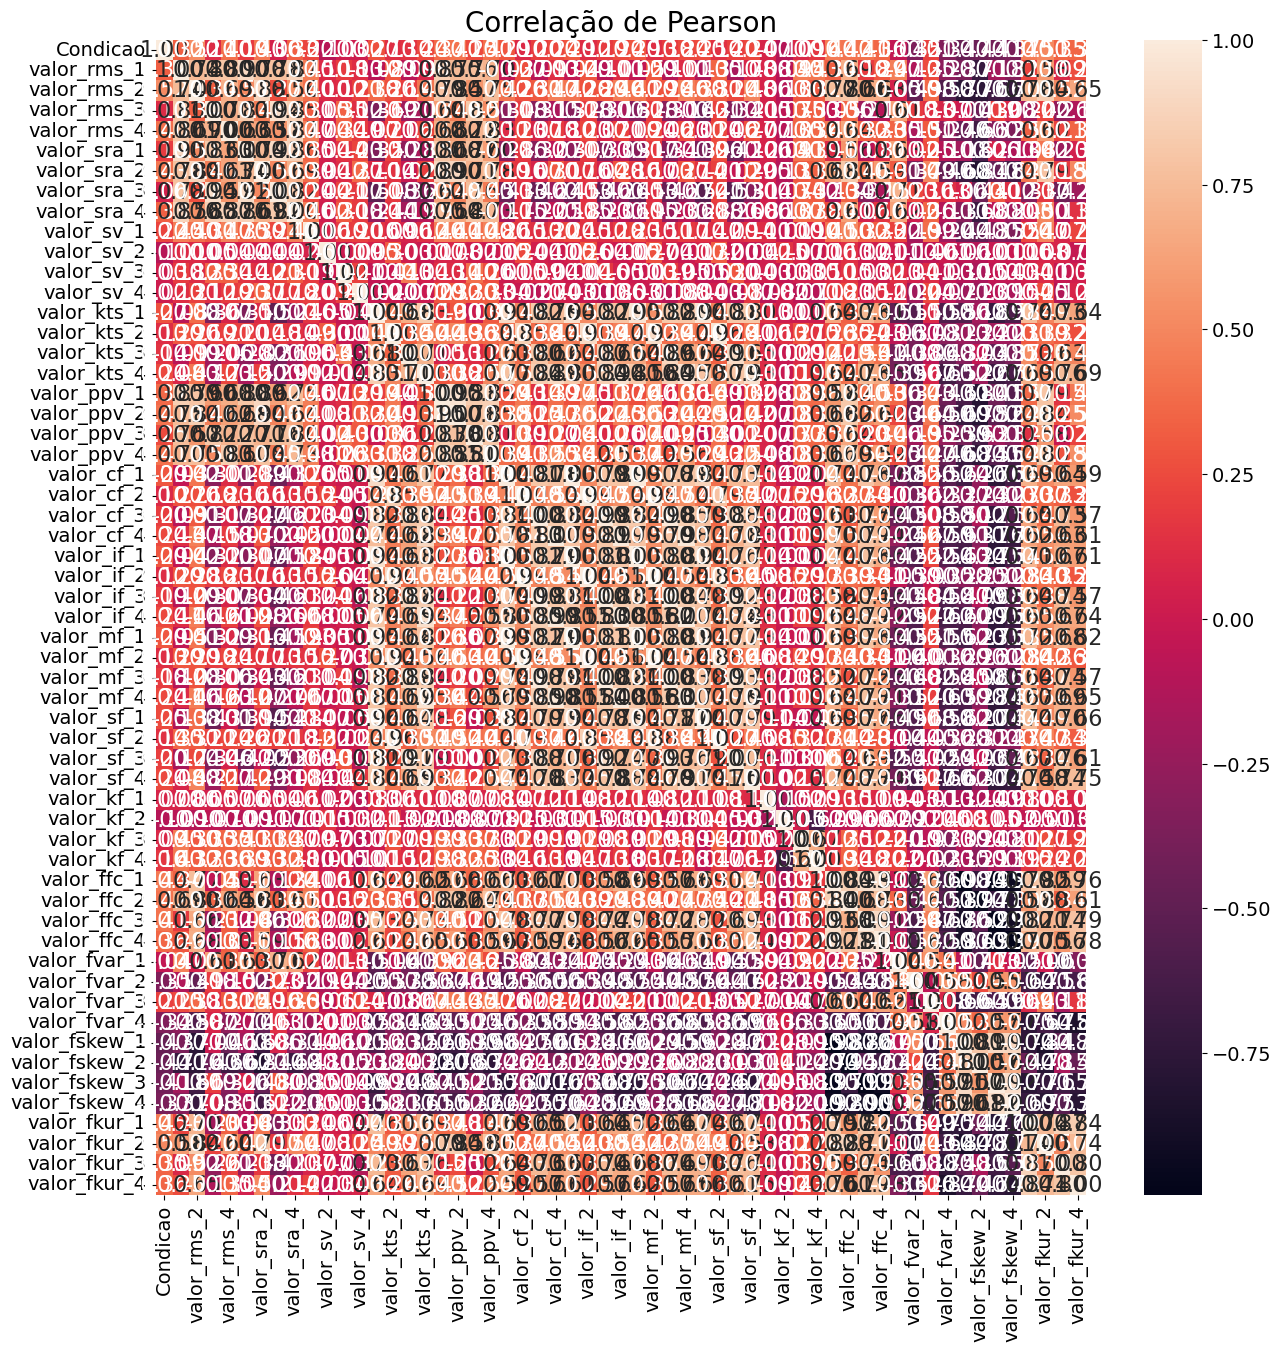

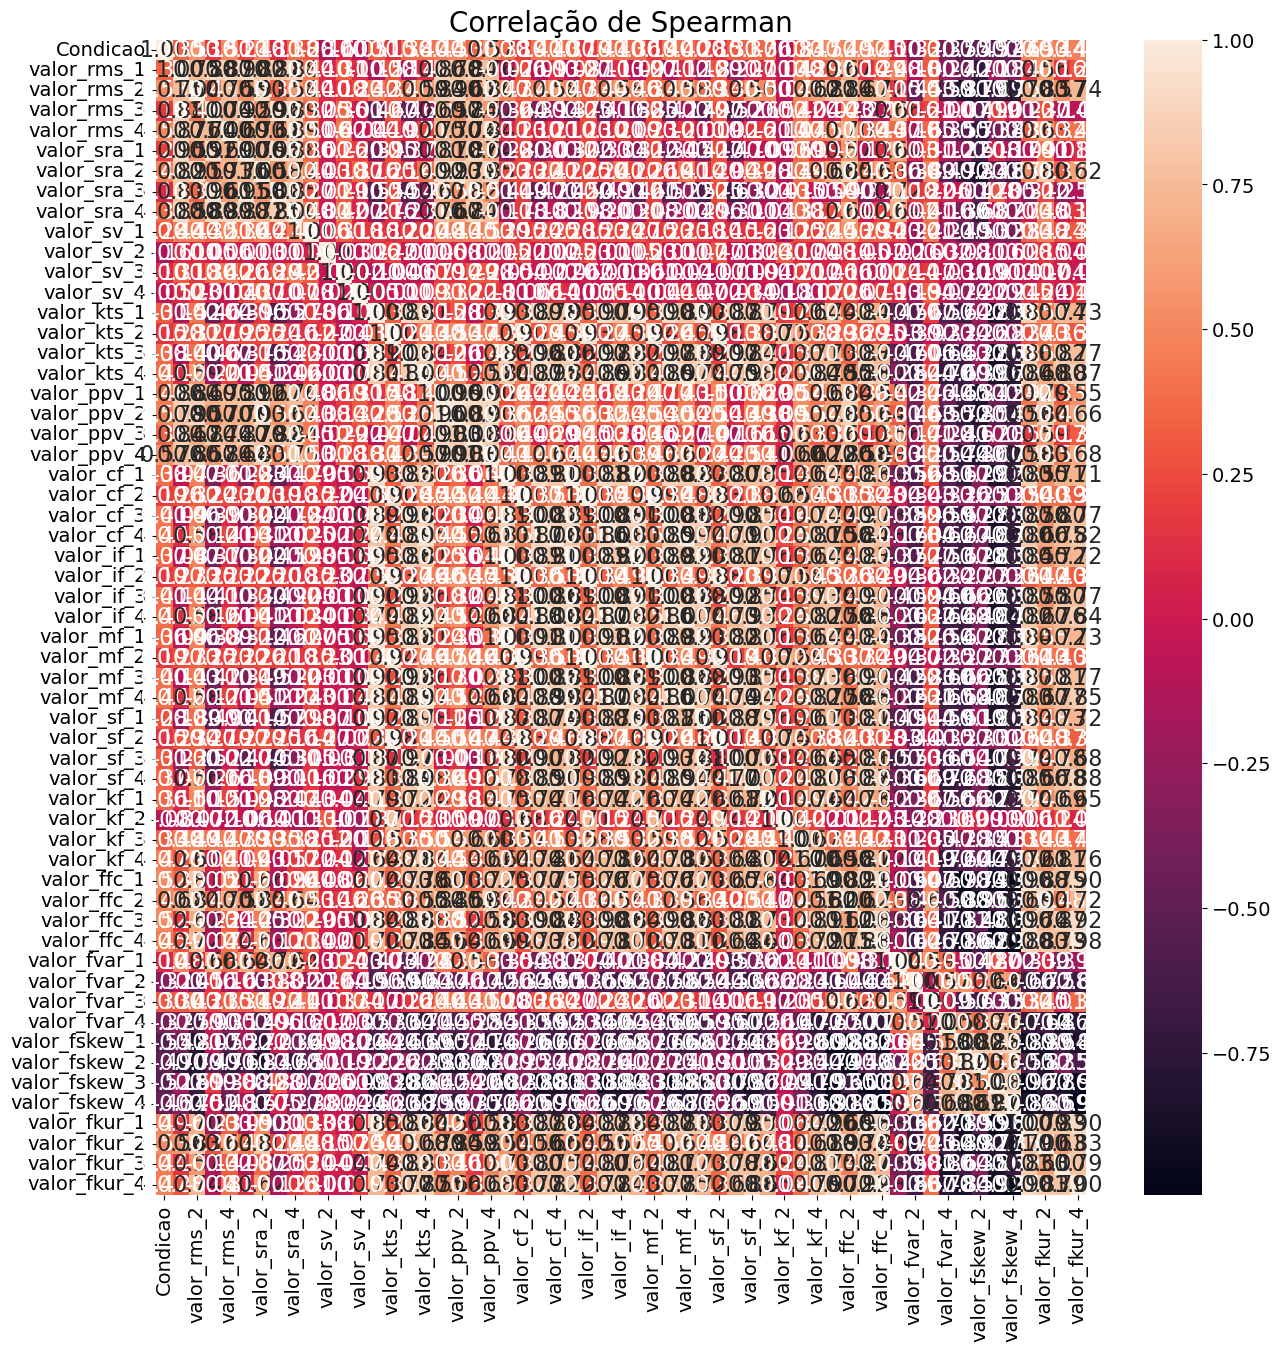

In [44]:
# Correlação de Pearson
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt=".2f")
plt.title('Correlação de Pearson', fontsize=20)
plt.savefig('grafico_pearson.pdf')
plt.show()

# Correlação de Spearman
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt=".2f")
plt.title('Correlação de Spearman', fontsize=20)
plt.savefig('grafico_spearman.pdf')
plt.show()


In [45]:
# Cria um DataFrame onde a coluna 'Condicao' contém os valores 18, 19 ou 20
df1 = df[df['Condicao'].isin([18, 19, 20, 9, 10, 11, 33, 34, 35, 21, 22, 23, 39, 40, 41])]

# Cria um DataFrame com as linhas restantes
df2 = df[~df['Condicao'].isin([18, 19, 20, 9, 10, 11, 33, 34, 35, 21, 22, 23, 39, 40, 41])]

df

Condicao  valor_rms_1  valor_rms_2  valor_rms_3  valor_rms_4  \
720          0     0.000164     0.000243     0.000156     0.000142   
721          0     0.000160     0.000242     0.000154     0.000140   
722          0     0.000160     0.000243     0.000155     0.000143   
723          0     0.000157     0.000242     0.000154     0.000141   
724          0     0.000161     0.000248     0.000155     0.000143   
...        ...          ...          ...          ...          ...   
5031        41     0.000815     0.000874     0.001319     0.000887   
5032        41     0.000814     0.000878     0.001318     0.000887   
5033        41     0.000834     0.000887     0.001316     0.000885   
5034        41     0.000819     0.000856     0.001314     0.000877   
5035        41     0.000812     0.000865     0.001313     0.000878   

      valor_sra_1  valor_sra_2  valor_sra_3  valor_sra_4  valor_sv_1  ...  \
720      0.003066     0.004583     0.003069     0.002687   -0.213166  ...   
721      0.003039     0.004592     0.003002     0.002634   -0.155186  ...   
722      0.002969     0.004513     0.003042     0.002683   -0.094299  ...   
723      0.002930     0.004560     0.003004     0.002635   -0.183873  ...   
724      0.003000     0.004653     0.003035     0.002696   -0.170847  ...   
...           ...          ...          ...          ...         ...  ...   
5031     0.026900     0.027267     0.047602     0.029332    0.044020  ...   
5032     0.026715     0.027224     0.047365     0.029192    0.034651  ...   
5033     0.027435     0.027288     0.047501     0.029231    0.046254  ...   
5034     0.027000     0.026804     0.047288     0.028668    0.029645  ...   
5035     0.026752     0.027182     0.047404     0.029055    0.043195  ...   

       valor_fvar_3   valor_fvar_4  valor_fskew_1  valor_fskew_2  \
720   442101.659706  496602.224428       0.290876       0.052966   
721   443446.697065  495962.230603       0.282650       0.072017   
722   442488.899220  495063.917025       0.305274       0.099354   
723   451174.498450  491347.031129       0.267322       0.045081   
724   450560.150230  493943.755109       0.220580       0.017961   
...             ...            ...            ...            ...   
5031  506704.956602  376183.100858      -0.292556      -0.915047   
5032  503373.552016  370299.918976      -0.286758      -0.897234   
5033  514629.524041  374742.451863      -0.291978      -0.893331   
5034  510563.235622  376144.749653      -0.283143      -0.881602   
5035  509339.651228  361536.744641      -0.315242      -0.933082   

      valor_fskew_3  valor_fskew_4  valor_fkur_1  valor_fkur_2  valor_fkur_3  \
720        0.514393      -0.102634     17.124678     24.935370      7.182430   
721        0.518766      -0.096950     17.205080     25.050848      7.051738   
722        0.500940      -0.120861     16.691252     23.155704      7.147752   
723        0.492605      -0.113071     16.933327     24.744169      7.155178   
724        0.478621      -0.121202     18.544964     25.960359      7.216807   
...             ...            ...           ...           ...           ...   
5031       0.067142      -0.979988     23.377148    126.662970      9.041599   
5032       0.092277      -0.999410     22.545664    123.588118      8.709094   
5033       0.086005      -0.998312     23.379855    120.542569      8.541299   
5034       0.085110      -0.991366     23.191168    113.730712      8.589431   
5035       0.058964      -1.061912     24.572486    126.168415      8.983112   

      valor_fkur_4  
720      13.543436  
721      13.445607  
722      13.997952  
723      13.946492  
724      14.170035  
...            ...  
5031     61.176289  
5032     62.681019  
5033     62.414062  
5034     61.498721  
5035     69.425747  

[4316 rows x 57 columns]

In [46]:
df1 = df1.copy()

df1['Condicao'] = df1['Condicao'].replace({18:0, 19: 1, 20: 2, 9: 4, 10: 4, 11: 4, 33: 5, 34: 5, 35: 5, 21: 6, 22: 6, 23: 6,
                                           39: 3, 40: 3, 41: 3})
df1

Condicao  valor_rms_1  valor_rms_2  valor_rms_3  valor_rms_4  \
1080         4     0.000282     0.000402     0.000232     0.000372   
1081         4     0.000285     0.000404     0.000227     0.000370   
1082         4     0.000278     0.000400     0.000224     0.000348   
1083         4     0.000289     0.000414     0.000231     0.000377   
1084         4     0.000287     0.000407     0.000231     0.000376   
...        ...          ...          ...          ...          ...   
5031         3     0.000815     0.000874     0.001319     0.000887   
5032         3     0.000814     0.000878     0.001318     0.000887   
5033         3     0.000834     0.000887     0.001316     0.000885   
5034         3     0.000819     0.000856     0.001314     0.000877   
5035         3     0.000812     0.000865     0.001313     0.000878   

      valor_sra_1  valor_sra_2  valor_sra_3  valor_sra_4  valor_sv_1  ...  \
1080     0.005013     0.007316     0.004024     0.006288   -0.108007  ...   
1081     0.005161     0.007352     0.003973     0.006180   -0.072934  ...   
1082     0.004976     0.007179     0.003960     0.005935   -0.058120  ...   
1083     0.005123     0.007477     0.004054     0.006311   -0.038220  ...   
1084     0.005075     0.007326     0.004032     0.006352   -0.039333  ...   
...           ...          ...          ...          ...         ...  ...   
5031     0.026900     0.027267     0.047602     0.029332    0.044020  ...   
5032     0.026715     0.027224     0.047365     0.029192    0.034651  ...   
5033     0.027435     0.027288     0.047501     0.029231    0.046254  ...   
5034     0.027000     0.026804     0.047288     0.028668    0.029645  ...   
5035     0.026752     0.027182     0.047404     0.029055    0.043195  ...   

       valor_fvar_3   valor_fvar_4  valor_fskew_1  valor_fskew_2  \
1080  404773.046446  373330.902227       0.147994       0.097088   
1081  404917.648381  375046.551009       0.127122       0.117995   
1082  402729.979358  383298.991253       0.143941       0.116555   
1083  402680.605249  372624.216423       0.140859       0.087112   
1084  405210.220184  379920.187040       0.138097       0.088036   
...             ...            ...            ...            ...   
5031  506704.956602  376183.100858      -0.292556      -0.915047   
5032  503373.552016  370299.918976      -0.286758      -0.897234   
5033  514629.524041  374742.451863      -0.291978      -0.893331   
5034  510563.235622  376144.749653      -0.283143      -0.881602   
5035  509339.651228  361536.744641      -0.315242      -0.933082   

      valor_fskew_3  valor_fskew_4  valor_fkur_1  valor_fkur_2  valor_fkur_3  \
1080      -0.161707      -0.898458     23.893851     27.082382     28.934360   
1081      -0.159826      -0.899921     24.757749     26.976608     28.246428   
1082      -0.111592      -0.839249     24.272386     26.807751     26.670241   
1083      -0.177533      -0.907131     24.426890     28.534169     29.626973   
1084      -0.136253      -0.883581     23.710047     28.132474     27.697743   
...             ...            ...           ...           ...           ...   
5031       0.067142      -0.979988     23.377148    126.662970      9.041599   
5032       0.092277      -0.999410     22.545664    123.588118      8.709094   
5033       0.086005      -0.998312     23.379855    120.542569      8.541299   
5034       0.085110      -0.991366     23.191168    113.730712      8.589431   
5035       0.058964      -1.061912     24.572486    126.168415      8.983112   

      valor_fkur_4  
1080     72.914905  
1081     72.612114  
1082     65.102972  
1083     74.041395  
1084     70.585724  
...            ...  
5031     61.176289  
5032     62.681019  
5033     62.414062  
5034     61.498721  
5035     69.425747  

[1800 rows x 57 columns]

In [47]:
X_treino, y_treino = df2.drop('Condicao', axis=1), df2['Condicao']
y_treino

720     0
721     0
722     0
723     0
724     0
       ..
4671    6
4672    6
4673    6
4674    6
4675    6
Name: Condicao, Length: 2516, dtype: int64

In [48]:
X_teste, y_teste = df1.drop('Condicao', axis=1), df1['Condicao']
y_teste

1080    4
1081    4
1082    4
1083    4
1084    4
       ..
5031    3
5032    3
5033    3
5034    3
5035    3
Name: Condicao, Length: 1800, dtype: int64

In [49]:
# import pandas as pd
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel

# SELEÇÃO DE FEATURES POR ÁRVORE DE DECISÃO

# # Certifique-se de que X_treino é um DataFrame com nomes de colunas corretos
# X_treino2 = X_treino
# y_treino2 = y_treino

# # Criar e ajustar o classificador
# clf = ExtraTreesClassifier(n_estimators=2000)
# clf.fit(X_treino2, y_treino2)

# # Criar o modelo de seleção de recursos
# model = SelectFromModel(clf, prefit=True)

# # Transformar os dados para manter apenas os recursos mais importantes
# X_new = model.transform        

# # Obter os índices dos recursos selecionados
# selected_features_bool = model.get_support()

# # Obter os nomes dos recursos selecionados
# selected_features_names = X_treino.columns[selected_features_bool]

# print(f"Recursos selecionados: {selected_features_names.tolist()}")

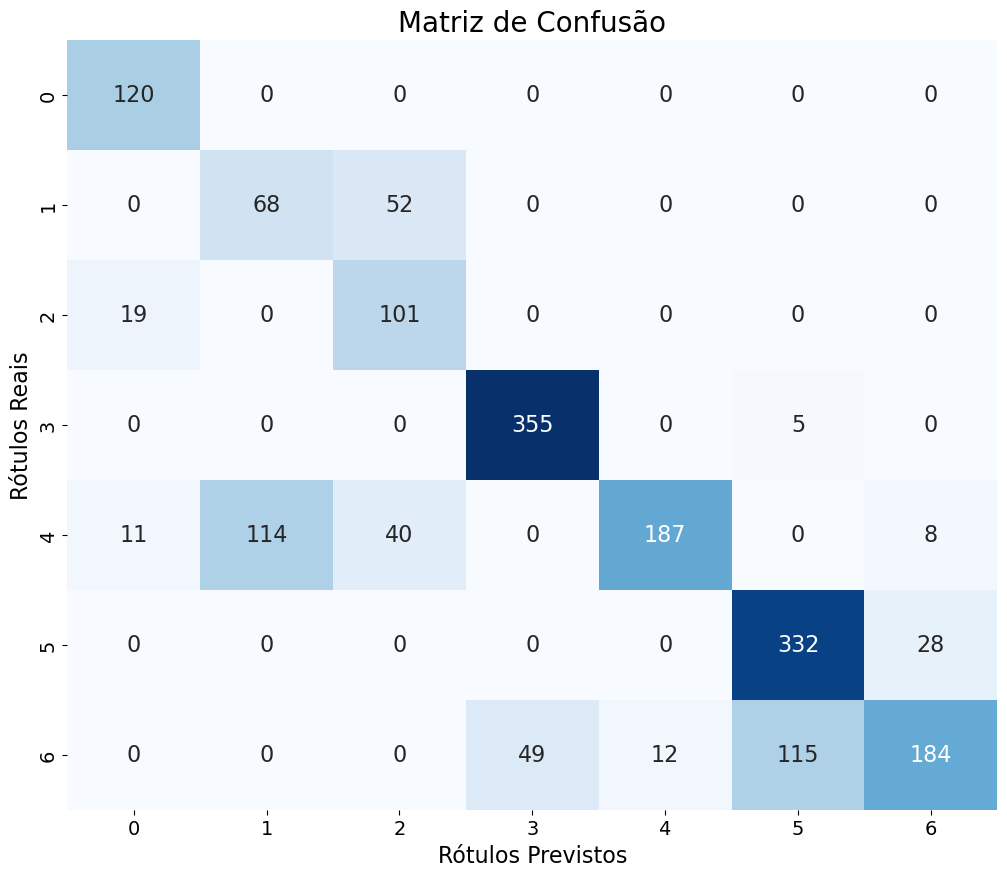

In [56]:
# Obtenha os valores únicos na coluna 'Condicao'
rotulos_unicos = np.sort(df2['Condicao'].unique())

parametros_otimos = {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 
                      'min_samples_leaf': 1, 'n_estimators': 3000,  'min_samples_split': 5}#, 'max_samples':0.8}
#parametros_otimos = grid_search.best_params_

# Crie e ajuste o modelo com os parâmetros ótimos
rfc = RandomForestClassifier(**parametros_otimos)
rfc.fit(X_treino, y_treino)

#clf.fit(X_treino, y_treino)
Y_pred=rfc.predict(X_teste)

# Crie a matriz de confusão
cm = metrics.confusion_matrix(y_teste, Y_pred, labels=rotulos_unicos)

# Crie um mapa de calor usando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=rotulos_unicos, yticklabels=rotulos_unicos)

plt.title("Matriz de Confusão")
plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Reais")
plt.show()


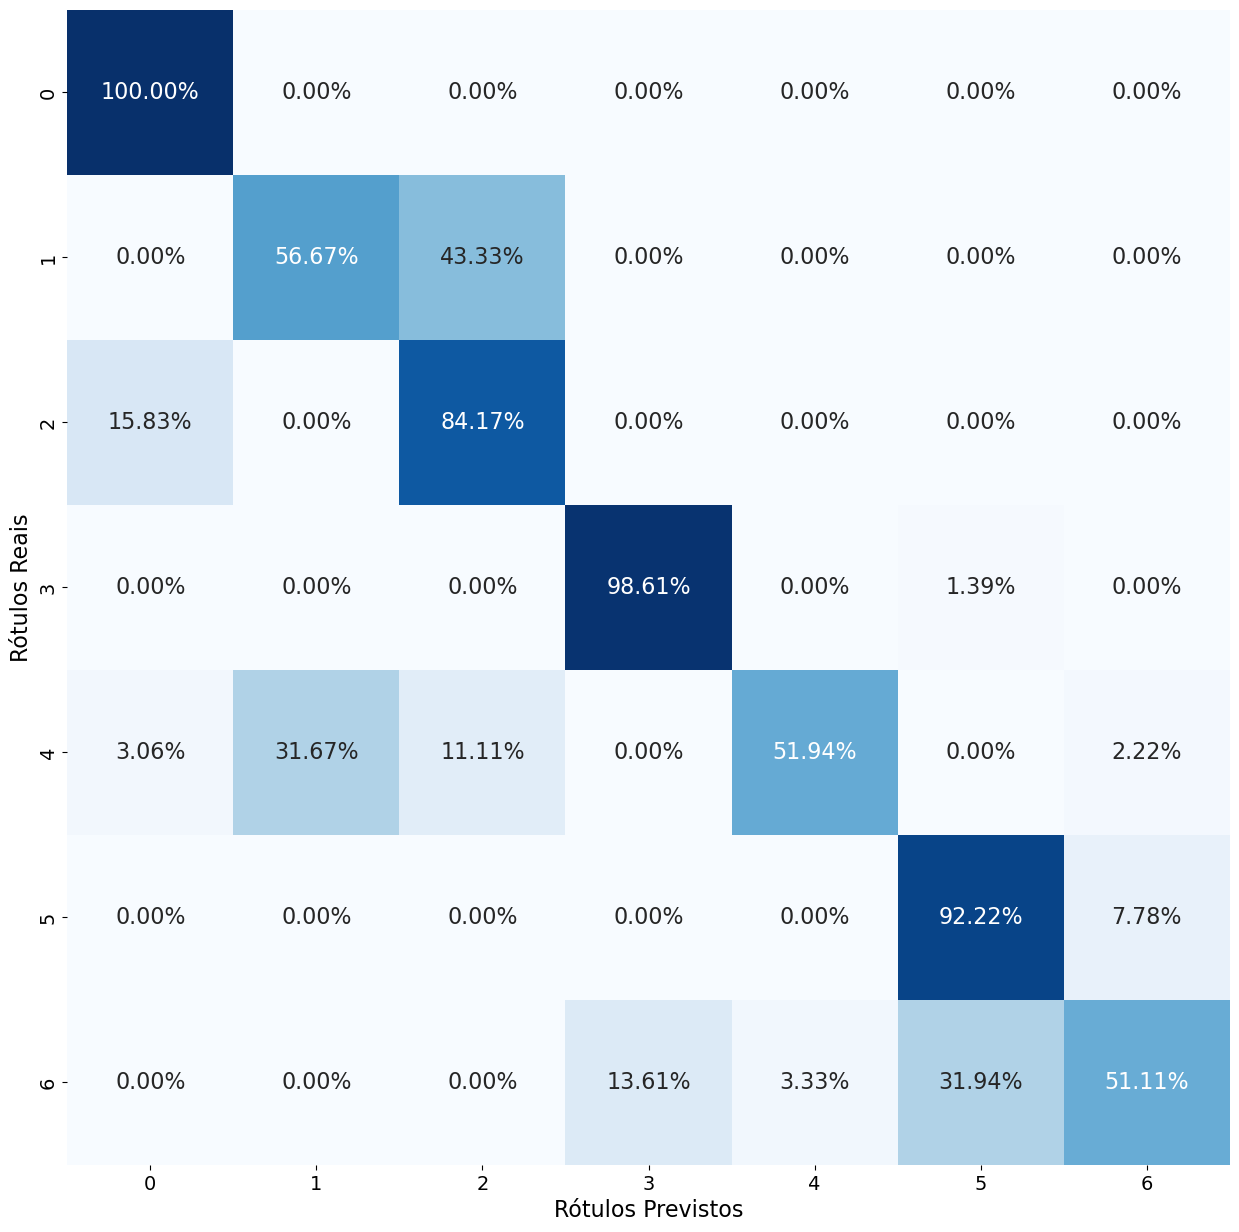

In [57]:
# Obtenha os valores únicos na coluna 'Condicao'
rotulos_unicos = np.sort(df2['Condicao'].unique())

# Crie a matriz de confusão
cm = metrics.confusion_matrix(y_teste, Y_pred, labels=rotulos_unicos)

# Normalize a matriz de confusão para obter porcentagens
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-10)

# Crie um mapa de calor usando seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(cm_norm, annot=True, fmt=".2%", cmap="Blues", cbar=False, xticklabels=rotulos_unicos, yticklabels=rotulos_unicos)

#plt.title("Matriz de Confusão")
plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Reais")
plt.savefig('predicao-caso-ideal2.pdf')
plt.show()


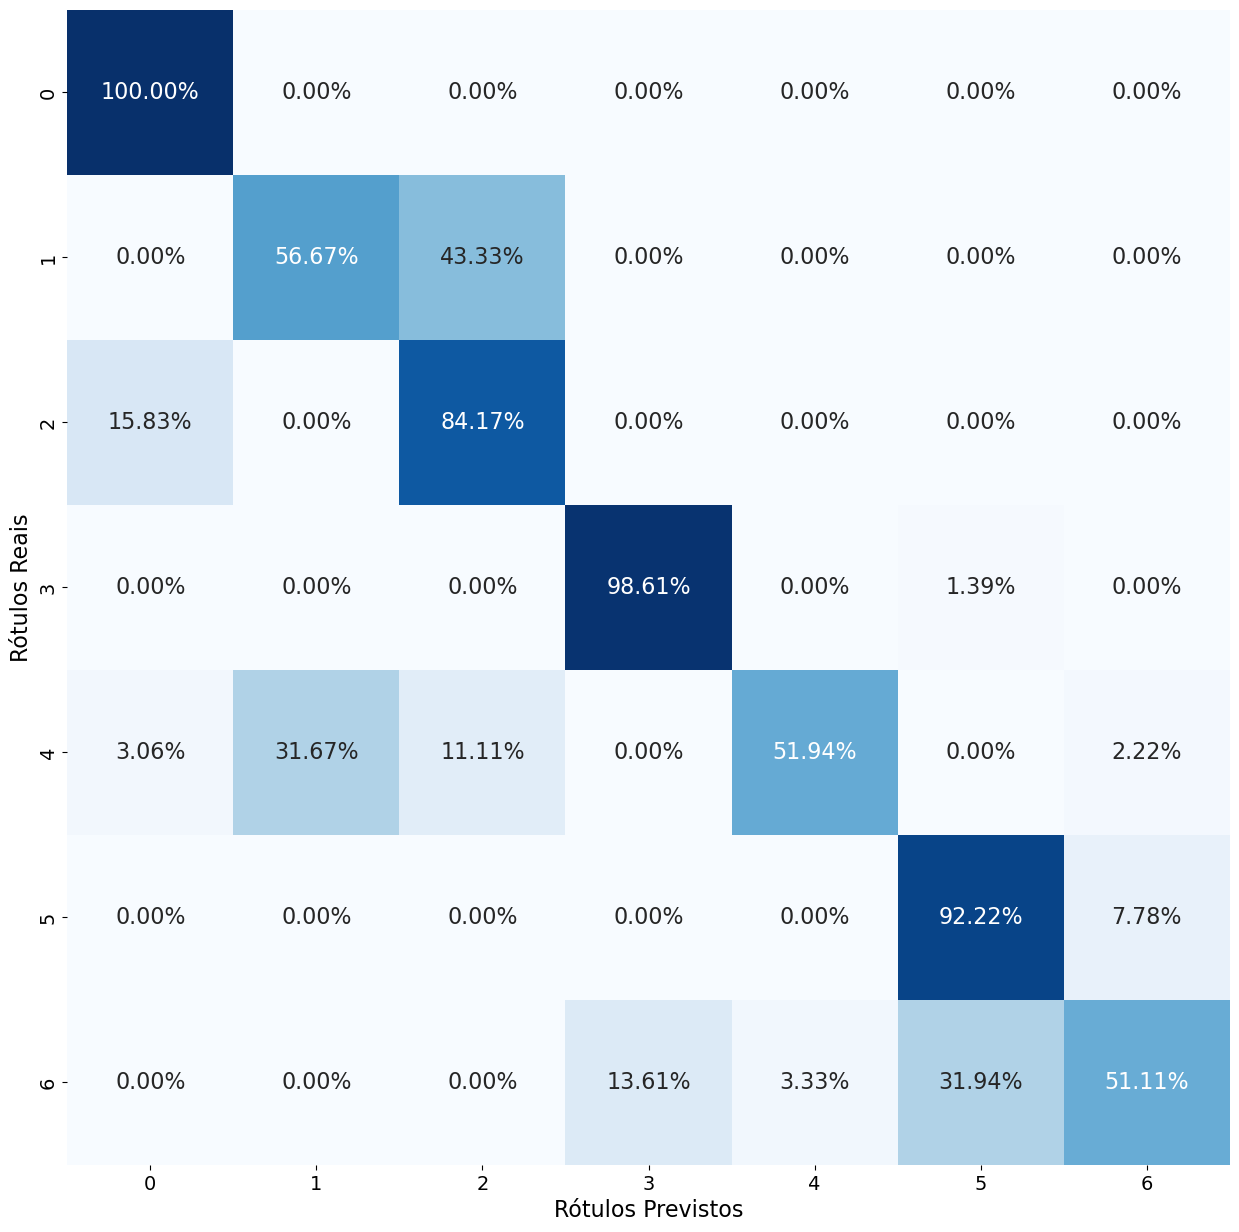

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Supondo que df2, y_teste e Y_pred já estão definidos no seu contexto
# Obtenha os valores únicos na coluna 'Condicao'
rotulos_unicos = np.sort(df2['Condicao'].unique())

# Crie a matriz de confusão
cm = metrics.confusion_matrix(y_teste, Y_pred, labels=rotulos_unicos)

# Normalize a matriz de confusão para obter porcentagens
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-10)

# Configurações de estilo de fonte
plt.rc('font', size=16)  # tamanho da fonte padrão
plt.rc('axes', titlesize=20)  # tamanho da fonte do título dos eixos
plt.rc('axes', labelsize=18)  # tamanho da fonte dos rótulos dos eixos
plt.rc('xtick', labelsize=14)  # tamanho da fonte dos rótulos dos ticks do eixo x
plt.rc('ytick', labelsize=14)  # tamanho da fonte dos rótulos dos ticks do eixo y
plt.rc('legend', fontsize=16)  # tamanho da fonte da legenda
plt.rc('figure', titlesize=22)  # tamanho da fonte do título da figura

# Crie um mapa de calor usando seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(cm_norm, annot=True, fmt=".2%", cmap="Blues", cbar=False, xticklabels=rotulos_unicos, yticklabels=rotulos_unicos, annot_kws={"size": 16})

#plt.title("Matriz de Confusão")
plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Reais")
plt.savefig('predicao-caso-ideal2.pdf')
plt.show()


In [59]:
mse = accuracy_score(y_teste, Y_pred)
mse

0.7483333333333333

In [60]:
# Calcular várias métricas de avaliação
accuracy = accuracy_score(y_teste, Y_pred)
precision = precision_score(y_teste, Y_pred, average='weighted')
recall = recall_score(y_teste, Y_pred, average='weighted')
f1 = f1_score(y_teste, Y_pred, average='weighted')
conf_matrix = confusion_matrix(y_teste, Y_pred)
class_report = classification_report(y_teste, Y_pred)

# Exibir as métricas
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7483333333333333
Precision: 0.7909871506100411
Recall: 0.7483333333333333
F1 Score: 0.7424234282272368
Confusion Matrix:
[[120   0   0   0   0   0   0]
 [  0  68  52   0   0   0   0]
 [ 19   0 101   0   0   0   0]
 [  0   0   0 355   0   5   0]
 [ 11 114  40   0 187   0   8]
 [  0   0   0   0   0 332  28]
 [  0   0   0  49  12 115 184]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       120
           1       0.37      0.57      0.45       120
           2       0.52      0.84      0.65       120
           3       0.88      0.99      0.93       360
           4       0.94      0.52      0.67       360
           5       0.73      0.92      0.82       360
           6       0.84      0.51      0.63       360

    accuracy                           0.75      1800
   macro avg       0.73      0.76      0.72      1800
weighted avg       0.79      0.75      0.74      1800



In [22]:
# Identificando as linhas que obtiveram predição errada
wrong_predictions = X_teste[y_teste != Y_pred]

# # Adicionando a coluna com as predições erradas para referência
# wrong_predictions['true_label'] = y_teste[y_teste != Y_pred]
# wrong_predictions['predicted_label'] = Y_pred[y_teste != Y_pred]

# Mostrando as linhas de X_teste com predições erradas
print(len(wrong_predictions))

df_partial = pd.DataFrame(wrong_predictions)
df_partial

245


valor_rms_2  valor_sv_1  valor_sra_2  valor_ppv_1  valor_ppv_3  \
1240     0.000556    0.056461     0.014372     0.147550     0.238443   
1241     0.000569    0.054186     0.014464     0.156325     0.248679   
1242     0.000558    0.078095     0.014325     0.147219     0.245633   
1243     0.000552    0.058960     0.014328     0.150616     0.251506   
1244     0.000567    0.052455     0.014575     0.152572     0.231853   
...           ...         ...          ...          ...          ...   
4725     0.000828    0.501534     0.019961     0.210086     0.206312   
4728     0.000833    0.495049     0.020256     0.227208     0.198068   
4750     0.000824    0.483344     0.020082     0.212545     0.212114   
4958     0.000883    0.097812     0.021308     0.219385     0.262243   
4959     0.000881    0.125143     0.021402     0.206905     0.271913   

      valor_ppv_4  valor_cf_4  valor_mf_3  valor_ffc_2  valor_ffc_4  \
1240     0.178117    2.727003    2.192660  1064.210240   911.683490   
1241     0.198980    2.699698    2.253066  1056.537554   907.389300   
1242     0.194213    2.666774    2.243007  1048.087683   909.466543   
1243     0.174265    2.479977    2.208006  1038.628732   893.673900   
1244     0.187026    2.904644    2.223455  1057.778856   933.971692   
...           ...         ...         ...          ...          ...   
4725     0.219986    3.295101    4.300483  1308.141962  1343.404761   
4728     0.211925    3.386029    4.309865  1296.157404  1313.792013   
4750     0.219924    3.332549    4.260731  1286.803041  1329.105883   
4958     0.252163    3.150871    2.852934  1346.009521  1231.070176   
4959     0.247147    3.010892    3.042280  1341.610660  1212.437619   

       valor_fvar_4  valor_fskew_4  valor_fkur_3  valor_rms_1  valor_rms_4  \
1240  586053.941642       0.099757      4.262229     0.000982     0.000986   
1241  581936.249070       0.122331      4.387258     0.000992     0.001001   
1242  573947.035817       0.119134      4.373744     0.000991     0.000989   
1243  572104.585662       0.153238      4.410255     0.000984     0.000990   
1244  573733.358787       0.060403      4.368960     0.000955     0.000958   
...             ...            ...           ...          ...          ...   
4725  379744.050963      -1.129652     20.311791     0.000806     0.000954   
4728  393332.845931      -1.030314     17.716314     0.000821     0.000942   
4750  382326.129451      -1.079946     19.060500     0.000804     0.000944   
4958  450641.676528      -0.791248      8.783647     0.000944     0.001115   
4959  459058.395953      -0.757001      8.106870     0.000939     0.001110   

      valor_sf_2  valor_fkur_4  valor_kts_2  
1240    1.233779      7.279355     0.191021  
1241    1.247662      7.262589     0.424182  
1242    1.237521      7.488616     0.288466  
1243    1.229946      7.113877    -0.035391  
1244    1.235660      8.193288     0.123187  
...          ...           ...          ...  
4725    1.284665     70.584753     0.552236  
4728    1.279885     60.348910     0.536517  
4750    1.278251     66.755218     0.506944  
4958    1.283241     35.946698     0.398049  
4959    1.277345     32.705701     0.306576  

[245 rows x 18 columns]

In [23]:
# Listar as linhas de df_orig a partir dos índices de df_partial
rows_indices = df_partial.index.tolist()  # Obtém os índices a partir de df_partial

# Mostrar as linhas correspondentes do df_orig
df_orig.iloc[rows_indices].head(50)

arquivo  Condicao  Freq  \
1240  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1241  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1242  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1243  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1244  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1245  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1246  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1247  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1248  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1249  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1250  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1251  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1252  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1253  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1254  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1256  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1257  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1258  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1259  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1260  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1261  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1262  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1263  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1264  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1265  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1267  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1269  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1270  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1271  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1272  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1273  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1274  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1275  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1276  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1277  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1278  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1279  ../../Dados_MFS_2024\DADOS CONDICAO 10\37 hz\3...        10    37   
1366  ../../Dados_MFS_2024\DADOS CONDICAO 11\37 hz\3...        11    37   
1367  ../../Dados_MFS_2024\DADOS CONDICAO 11\37 hz\3...        11    37   
1372  ../../Dados_MFS_2024\DADOS CONDICAO 11\37 hz\3...        11    37   
1375  ../../Dados_MFS_2024\DADOS CONDICAO 11\37 hz\3...        11    37   
1381  ../../Dados_MFS_2024\DADOS CONDICAO 11\37 hz\3...        11    37   
1386  ../../Dados_MFS_2024\DADOS CONDICAO 11\37 hz\3...        11    37   
1388  ../../Dados_MFS_2024\DADOS CONDICAO 11\37 hz\3...        11    37   
1389  ../../Dados_MFS_2024\DADOS CONDICAO 11\37 hz\3...        11    37   
2403  ../../Dados_MFS_2024\DADOS CONDICAO 20\27 hz\2...        20    27   
2406  ../../Dados_MFS_2024\DADOS CONDICAO 20\27 hz\2...        20    27   
2407  ../../Dados_MFS_2024\DADOS CONDICAO 20\27 hz\2...        20    27   
2420  ../../Dados_MFS_2024\DADOS CONDICAO 20\27 hz\2...        20    27   
2421  ../../Dados_MFS_2024\DADOS CONDICAO 20\27 hz\2...        20    27   

      divisao  valor_rms_1  valor_rms_2  valor_rms_3  valor_rms_4  \
1240        0     0.036339     0.020575     0.069221     0.036474   
1241        1     0.036719     0.021070     0.069880     0.037026   
1242        2  

In [18]:
#OTIMIZAÇÃO DE HIPER-PARÂMETROS

# from sklearn.model_selection import GridSearchCV

# # Defina os parâmetros para a busca em grade
# param_grid = {
#     'n_estimators':  [2000, 3000, 4000, 5000],
#     'max_features': ['sqrt', 'log2', 0.25, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37],
#     'max_depth': [8, 10, 15],
#     'min_samples_leaf': [1, 2, 3],
#     'min_samples_split': [2, 5], 
#     'bootstrap': [True, False]
# }

# # Crie o modelo base
# rf = RandomForestClassifier()

# # Instancie a busca em grade
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)

# # Ajuste a busca em grade aos dados
# grid_search.fit(X_treino, y_treino)

# # Veja os melhores parâmetros
# print(grid_search.best_params_)